【問題1】自作データセットでの分類の学習

In [9]:
from PIL import Image
import sys
import os
import glob
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import albumentations as A

In [2]:
# duck画像を配列に格納
duck_images = []
file_path = "./duck/*"
for path in glob.glob(file_path):
    duck_image = Image.open(path)
    duck_image = duck_image.resize((224,224))
    duck_array = np.array(duck_image)
    duck_images.append(duck_array)
duck_images
duck_array = np.array(duck_images)
duck_array.shape

(3, 224, 224, 3)

In [3]:
# rabbit画像を配列に格納
rabbit_images = []
file_path = "./rabbit/*"
for path in glob.glob(file_path):
    rabbit_image = Image.open(path)
    rabbit_image = rabbit_image.resize((224,224))
    rabbit_array = np.array(rabbit_image)
    rabbit_images.append(rabbit_array)
rabbit_array = np.array(rabbit_images)
rabbit_array.shape

(3, 224, 224, 3)

In [4]:
# duck画像を配列に格納
test_images = []
file_path = "./test/*"
for path in glob.glob(file_path):
    test_image = Image.open(path)
    test_image = test_image.resize((224,224))
    test_array = np.array(test_image)
    test_images.append(test_array)
test_images
test_array = np.array(test_images)
test_array.shape

(5, 224, 224, 3)

In [5]:
X_test = test_array
X_test = X_test/255.

In [6]:
# 正解ラベルとして上から16枚をラベル0、4枚をラベル1にした配列を作る
zero = np.zeros(3)
one = np.ones(3)
y = np.concatenate((zero,one))
y

array([0., 0., 0., 1., 1., 1.])

In [7]:
# duckとrabbitの配列を合成する
X = np.concatenate((duck_array, rabbit_array),axis=0)
X = X/255.
X.shape


(6, 224, 224, 3)

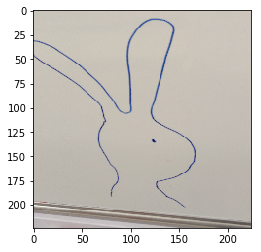

In [8]:
plt.imshow(X[0])

In [9]:
# train_test_splitする
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [10]:
y_val.shape

(2,)

In [11]:
#VGG１６のロード、分類機は含めない
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_base.trainable = False
#ベースに全結合分類機を追加
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Using TensorFlow backend.


In [27]:
#vgg13 = tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_tensor=tf.keras.layers.Input(shape=(224,224,3)), input_shape=None, pooling=None)
#vgg13.trainable=False
#x = vgg13.output
#flatten = tf.keras.layers.Flatten()(x)
#fc1 = tf.keras.layers.Dense(4096,activation=tf.nn.relu)(flatten)
#fc2 = tf.keras.layers.Dense(4096,activation=tf.nn.relu)(fc1)
#out = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(fc2)
#model = tf.keras.Model(inputs=vgg13.input, outputs=out)

In [12]:
from keras import  optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=0.01),
              metrics=['acc'])

In [13]:
model.fit(X_train,y_train,
          batch_size=1,
          epochs=100,
          validation_data=(X_val, y_val))

Train on 4 samples, validate on 2 samples
Epoch 1/100
4/4 [==============================] - 3s 707ms/step - loss: 4.1809 - acc: 0.7500 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 37ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 39ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 38ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 38ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 38ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 38ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 8/100


Epoch 61/100
4/4 [==============================] - 0s 39ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 62/100
4/4 [==============================] - 0s 38ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 63/100
4/4 [==============================] - 0s 38ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 64/100
4/4 [==============================] - 0s 38ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 65/100
4/4 [==============================] - 0s 38ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 66/100
4/4 [==============================] - 0s 38ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 67/100
4/4 [==============================] - 0s 38ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 68/100
4/4 [==============================

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [26]:
# 確率の出力
y_pred_proba = model.predict(X_test)[:,0]

# predictの出力
y_pred = np.where(y_pred_proba>0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

y_pred_proba [1. 1. 1. 1. 1.]
y_pred [1 1 1 1 1]


2枚の画像では全く学習が進まない

【問題2】分類データセットに対するデータ拡張

In [10]:
#Geometric augmentation
def geo_augment(image,p=0.5):
    horizon = A.HorizontalFlip(p=0.5)
    ran_rotate = A.RandomRotate90(p=1.0)
    cutout = A.Cutout(p=0.2)
    #shift_scale_rote = A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2)
    #trans_scale = A.RandomScale(p=0.2)
    aug =  A.Compose([horizon,ran_rotate,cutout],p=p)
    image = aug(image=image)['image']
    return image

In [11]:
#Color augmentation
def color_augment(image,p=0.5):
    brightness = A.RandomBrightness()
    blur = A.Blur()
    contrast = A.RandomContrast()
    aug = A.Compose([brightness, blur, contrast],p=p)
    image = aug(image=image)['image']
    return image

In [12]:
def augment_and_show(aug, image):
    image = aug(image=image)['image']
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

In [13]:
image = geo_augment(X[1])
image.shape

(224, 224, 3)

In [15]:
# albumentation
num = 19
augs = []
for i in range(len(X)):
    image = X[i]#original
    augs.append(image)
    for n in range(num):
        image = geo_augment(image)# 幾何学的変換
        image = color_augment(image)# 色を変換
        augs.append(image)
        
X=np.array(augs)


In [16]:
X.shape

(120, 224, 224, 3)

In [17]:
 # 正解ラベルとして上から3*(num+1)枚を0にそれ以外を1にする
zeros = np.zeros(60)
ones = np.ones(60)
y = np.concatenate((zeros, ones))
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [19]:
X_train.shape

(96, 224, 224, 3)

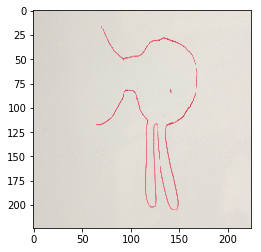

In [29]:
plt.imshow(X[41])

In [20]:
#VGG１６のロード、分類機は含めない
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_base.trainable = False
#ベースに全結合分類機を追加
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Using TensorFlow backend.


In [21]:
from keras import  optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=0.01),
              metrics=['acc'])

In [22]:
model.fit(X_train,y_train,
          batch_size=1,
          epochs=100,
          validation_data=(X_val, y_val))

Train on 96 samples, validate on 24 samples
Epoch 1/100
96/96 [==============================] - 7s 72ms/step - loss: 8.2390 - acc: 0.4792 - val_loss: 7.3875 - val_acc: 0.5417
Epoch 2/100
96/96 [==============================] - 3s 35ms/step - loss: 8.2269 - acc: 0.4896 - val_loss: 7.3875 - val_acc: 0.5417
Epoch 3/100
96/96 [==============================] - 3s 35ms/step - loss: 8.2269 - acc: 0.4896 - val_loss: 7.3875 - val_acc: 0.5417
Epoch 4/100
96/96 [==============================] - 3s 35ms/step - loss: 8.2269 - acc: 0.4896 - val_loss: 7.3875 - val_acc: 0.5417
Epoch 5/100
96/96 [==============================] - 3s 35ms/step - loss: 8.2269 - acc: 0.4896 - val_loss: 7.3875 - val_acc: 0.5417
Epoch 6/100
96/96 [==============================] - 3s 35ms/step - loss: 8.2269 - acc: 0.4896 - val_loss: 7.3875 - val_acc: 0.5417
Epoch 7/100
96/96 [==============================] - 3s 35ms/step - loss: 8.2269 - acc: 0.4896 - val_loss: 7.3875 - val_acc: 0.5417
Epoch 8/100
96/96 [=============

96/96 [==============================] - 3s 35ms/step - loss: 8.2269 - acc: 0.4896 - val_loss: 7.3875 - val_acc: 0.5417
Epoch 63/100
96/96 [==============================] - 3s 35ms/step - loss: 8.2269 - acc: 0.4896 - val_loss: 7.3875 - val_acc: 0.5417
Epoch 64/100
96/96 [==============================] - 3s 35ms/step - loss: 8.2269 - acc: 0.4896 - val_loss: 7.3875 - val_acc: 0.5417
Epoch 65/100
96/96 [==============================] - 3s 35ms/step - loss: 8.2269 - acc: 0.4896 - val_loss: 7.3875 - val_acc: 0.5417
Epoch 66/100
96/96 [==============================] - 3s 35ms/step - loss: 8.2269 - acc: 0.4896 - val_loss: 7.3875 - val_acc: 0.5417
Epoch 67/100
96/96 [==============================] - 3s 34ms/step - loss: 8.2269 - acc: 0.4896 - val_loss: 7.3875 - val_acc: 0.5417
Epoch 68/100
96/96 [==============================] - 3s 35ms/step - loss: 8.2269 - acc: 0.4896 - val_loss: 7.3875 - val_acc: 0.5417
Epoch 69/100
96/96 [==============================] - 3s 36ms/step - loss: 8.2269 

In [23]:
# 確率の出力
y_pred_proba = model.predict(X_test)[:,0]

# predictの出力
y_pred = np.where(y_pred_proba>0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

y_pred_proba [0. 0. 0. 0. 0.]
y_pred [0 0 0 0 0]


In [24]:
# test
model.predict(X_test)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

理由はわからないが全く学習していない

【問題3】物体検出データセットの用意
duck 3枚 rabbit 3枚

<img src="./ano.png" width="300" height="200">

path スペース x1,y1,x2,y2,class_categoryに annotation.txtを整形

In [71]:
label_dict = {'duck': '0', 'rabbit': '1'}
for label in label_dict:
    print(label)

duck
rabbit


In [70]:
import xml.etree.ElementTree as ET
label_path = './object_detection_data/*'
anos = []
for path in glob.glob(label_path):
    tree = ET.parse(path)
    root = tree.getroot()
    ano = root[2].text + ' ' + root[6][4][0].text +',' + root[6][4][1].text +','+root[6][4][2].text +','+root[6][4][3].text +','+label_dict[root[6][0].text]+'\n'
    anos += [ano]
    
    with open("objext_labels.txt", 'wt') as f:
        f.writelines(anos)

In [73]:
%run convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsi

Saved Keras model to model_data/yolo.h5
Read 62001757 of 62001757.0 from Darknet weights.


In [3]:
%run train.py

Create YOLOv3 model with 9 anchors and 2 classes.
Load weights model_data/yolo.h5.
Freeze the first 249 layers of total 252 layers.
Train on 11 samples, val on 1 samples, with batch size 32.
Epoch 1/50
1/1 [==============================] - 15s 15s/step - loss: 7563.8701 - val_loss: 7071.2148
Epoch 2/50
1/1 [==============================] - 8s 8s/step - loss: 6854.4111 - val_loss: 6248.5405
Epoch 3/50
1/1 [==============================] - 10s 10s/step - loss: 6115.8213 - val_loss: 5440.2749
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 5455.9292 - val_loss: 4893.5093
Epoch 5/50
1/1 [==============================] - 6s 6s/step - loss: 4781.9678 - val_loss: 4319.9185
Epoch 6/50
1/1 [==============================] - 10s 10s/step - loss: 4214.7495 - val_loss: 3673.7385
Epoch 7/50
1/1 [==============================] - 10s 10s/step - loss: 3717.3279 - val_loss: 3266.2698
Epoch 8/50
1/1 [==============================] - 10s 10s/step - loss: 3263.7703 - val_loss: 2

In [ ]:
%run yolo_video.py --image

Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,
model_data/yolo.h5 model, anchors, and classes loaded.
Input image filename:C:\Users\umini\git-test\diveintocode\sprint19\duck\IMG_duck03.jpg
(416, 416, 3)
Found 0 boxes for img
3.147444979175396
Input image filename:C:\Users\umini\git-test\diveintocode\sprint19\obj\ect_detection_data
Open Error! Try again!
Input image filename:C:\Users\umini\git-test\diveintocode\sprint19\object_detection_data\IMG_rabbit11.xml
Open Error! Try again!
Input image filename:C:\Users\umini\git-test\diveintocode\sprint19\data\IMG_rabbit13.jpg
(416, 416, 3)
Found 0 boxes for img
0.30304986271914913


【問題5】物体検出データセットに対するデータ拡張

albumentationを動かす

In [1]:
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose
)

In [2]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [3]:
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [4]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params={'format': 'coco', 'min_area': min_area, 'min_visibility': min_visibility, 'label_fields': ['category_id']})

In [5]:
image = download_image('http://images.cocodataset.org/train2017/000000386298.jpg')

In [6]:
# Annotations for image 386298 from COCO http://cocodataset.org/#explore?id=386298
annotations = {'image': image, 'bboxes': [[366.7, 80.84, 132.8, 181.84], [5.66, 138.95, 147.09, 164.88]], 'category_id': [18, 17]}
category_id_to_name = {17: 'cat', 18: 'dog'}

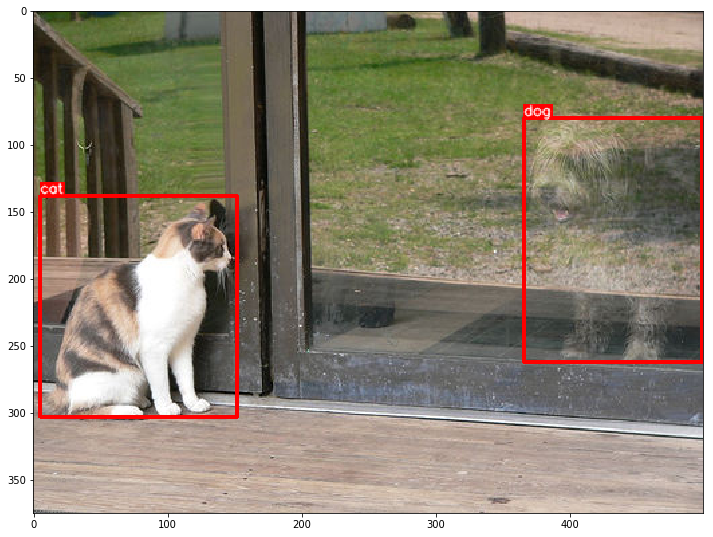

In [7]:
visualize(annotations, category_id_to_name)

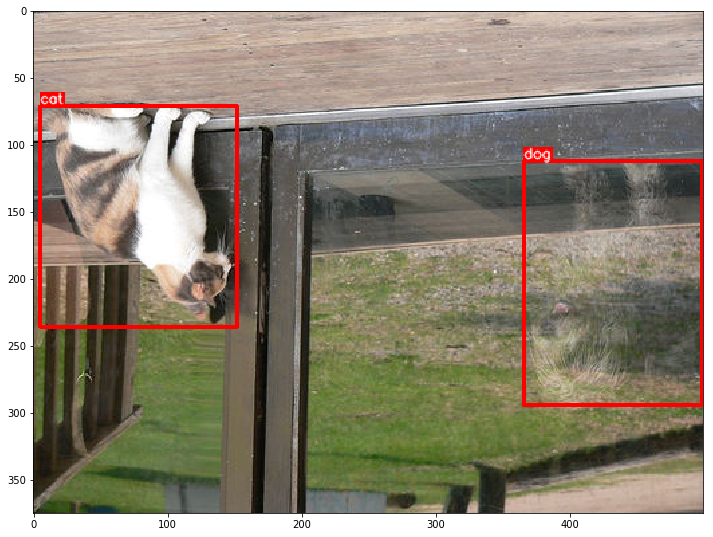

In [8]:
aug = get_aug([VerticalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)